# **Student Performance Indicator** 


Life cycle of Machine Learning project
- Data Collection
- Data checks and perform
- EDA
- Data Preprocessing
- Model Building
- Choose the best model



### **Problem statement:**

- Understand how the students are performance is effected by various factors such as Gender, Ethnicity, Parental level of education, Lunch, Test preparation course, etc.





In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#importing csv file 
df = pd.read_csv('data/dataset.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [9]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2. Data checks and perform
- Check missing values
- Check Duplicate values
- Check data types
- Check the number of unique values in each column
- Check statistical summary of the data
- Check various categories in each column

In [10]:
#checking null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#checking duplicate values
df.duplicated().sum()

0

In [12]:
#checking unique values
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
#check statistics
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight of data checking 
- No missing values
- No duplicate values
- Some columns are categorical and some are numerical
- Statistical summary of the data shows the mean, standard deviation, min, max, etc.

In [14]:
#exploring the data 
print("Categories in 'gender' variable:      ",end=" ")
print(df['gender'].unique())

print("Categories in 'race' variable:      ",end=" ")
print(df['race/ethnicity'].unique())


print("Categories in 'parential level of education' variable:      ",end=" ")
print(df['parental level of education'].unique())


print("Categories in 'lunch' variable:      ",end=" ")
print(df['lunch'].unique())



print("Categories in 'test preparation course' variable:      ",end=" ")
print(df['test preparation course'].unique())





Categories in 'gender' variable:       ['female' 'male']
Categories in 'race' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parential level of education' variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test preparation course' variable:       ['none' 'completed']


In [15]:
#define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

#printing the colums
print("{} Numerical Features: {}".format(len(numerical_features),numerical_features))
print("{} Categorical Features: {}".format(len(categorical_features),categorical_features))

3 Numerical Features: ['math score', 'reading score', 'writing score']
5 Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
#adding colums for total marks and percentage
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['percentage'] = df['total score']/3
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [17]:
#checking the number of students with full marks 
reading_full = df[df['reading score'] == 100]['percentage'].count()
writing_full = df[df['writing score'] == 100]['percentage'].count()
math_full = df[df['math score'] == 100]['percentage'].count()

print("Number of students with full marks in reading: ",reading_full)
print("Number of students with full marks in writing: ",writing_full)
print("Number of students with full marks in math: ",math_full)


Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in math:  7


### 3. EDA (Exploratory Data Analysis)

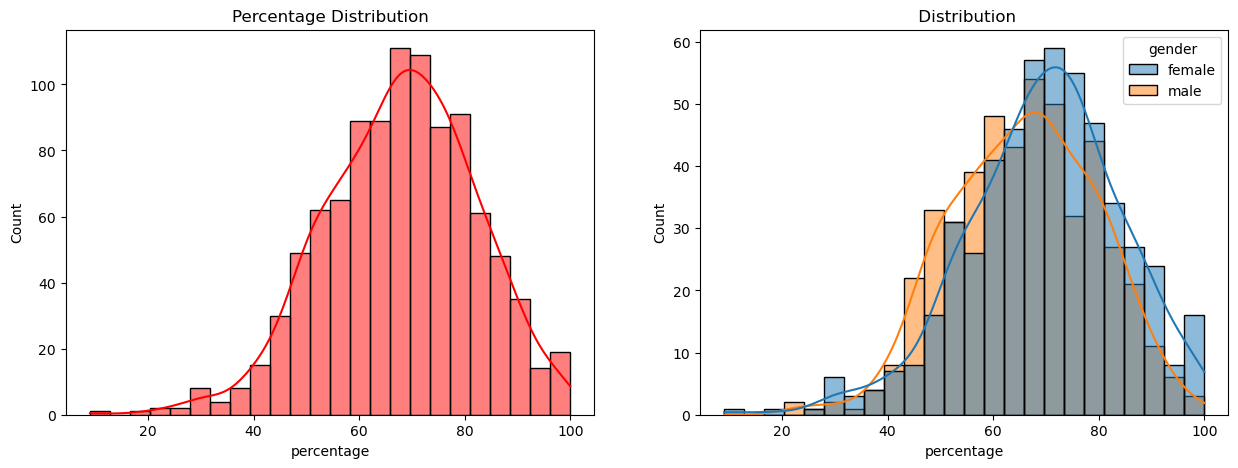

In [20]:
#histogram 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df,x ='percentage', kde=True, color='red')
plt.title('Percentage Distribution')
plt.subplot(122)
sns.histplot(data = df, x ='percentage', kde=True, hue='gender')
plt.title(' Distribution')
plt.show()

##### Insight of EDA
  - Female students perform better then male student

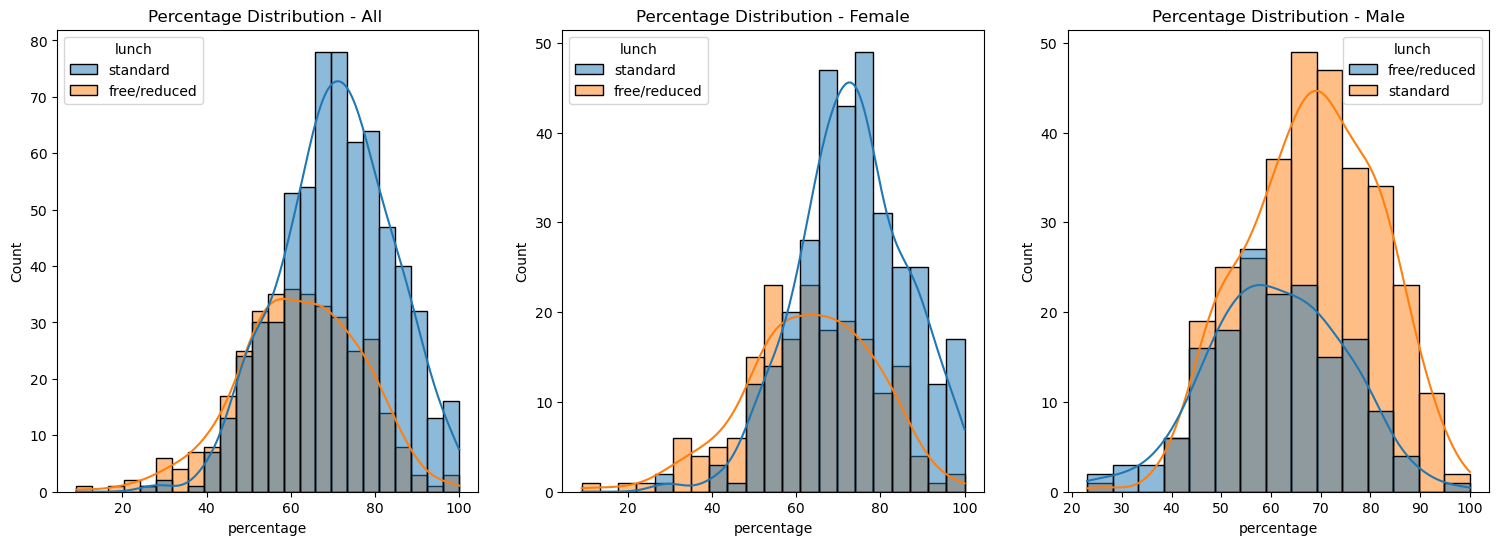

In [30]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='percentage',kde=True,hue='lunch')
plt.title('Percentage Distribution - All ')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='percentage',kde=True,hue='lunch')
plt.title('Percentage Distribution - Female')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='percentage',kde=True,hue='lunch')
plt.title('Percentage Distribution - Male')

plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

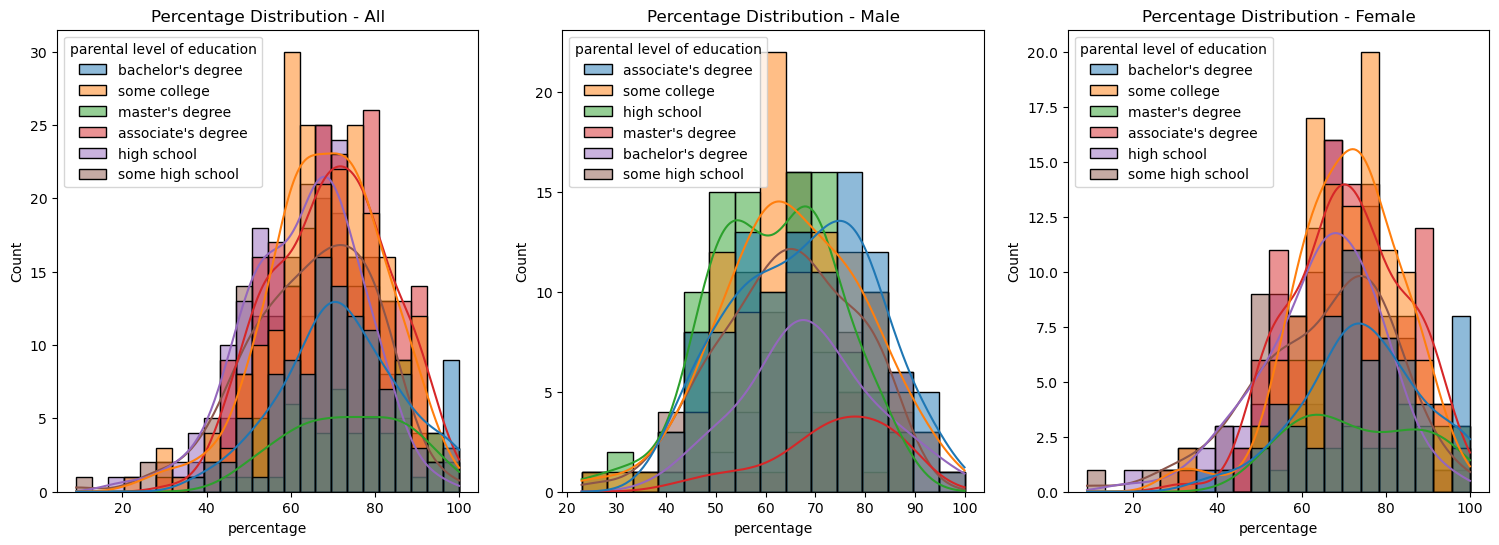

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='percentage',kde=True,hue='parental level of education')
plt.title('Percentage Distribution - All')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='percentage',kde=True,hue='parental level of education')
plt.title('Percentage Distribution - Male')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='percentage',kde=True,hue='parental level of education')
plt.title('Percentage Distribution - Female')

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

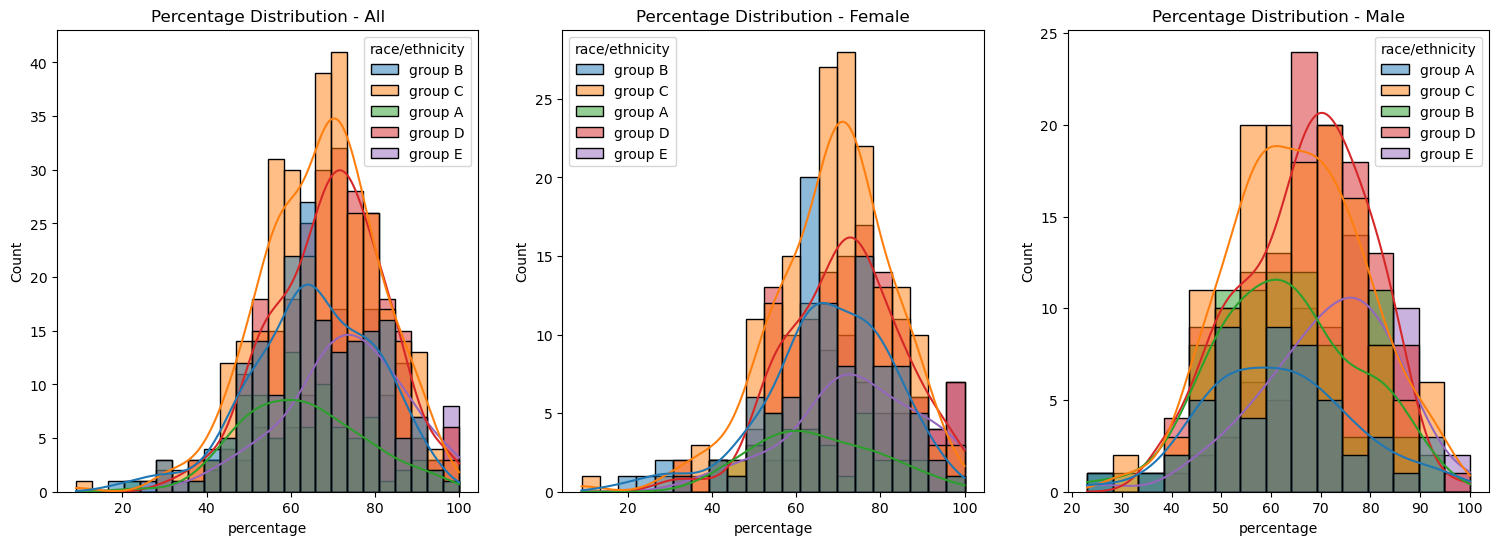

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='percentage',kde=True,hue='race/ethnicity')
plt.title('Percentage Distribution - All')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='percentage',kde=True,hue='race/ethnicity')
plt.title('Percentage Distribution - Female')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='percentage',kde=True,hue='race/ethnicity')
plt.title('Percentage Distribution - Male')

plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

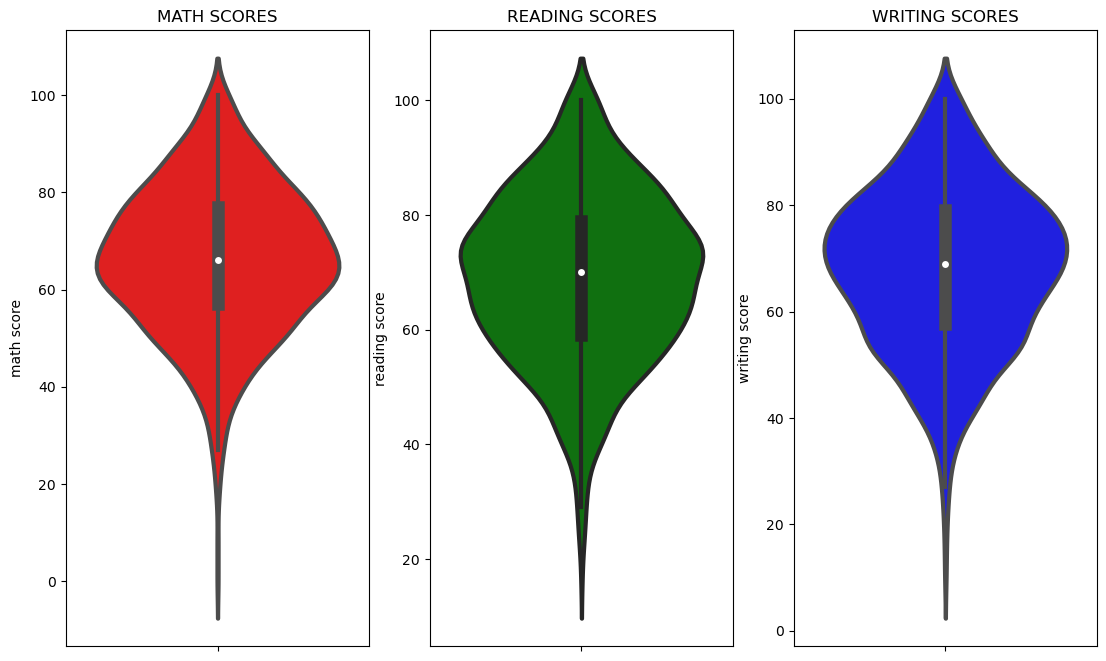

In [33]:
#maximum score of students in all 3 subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

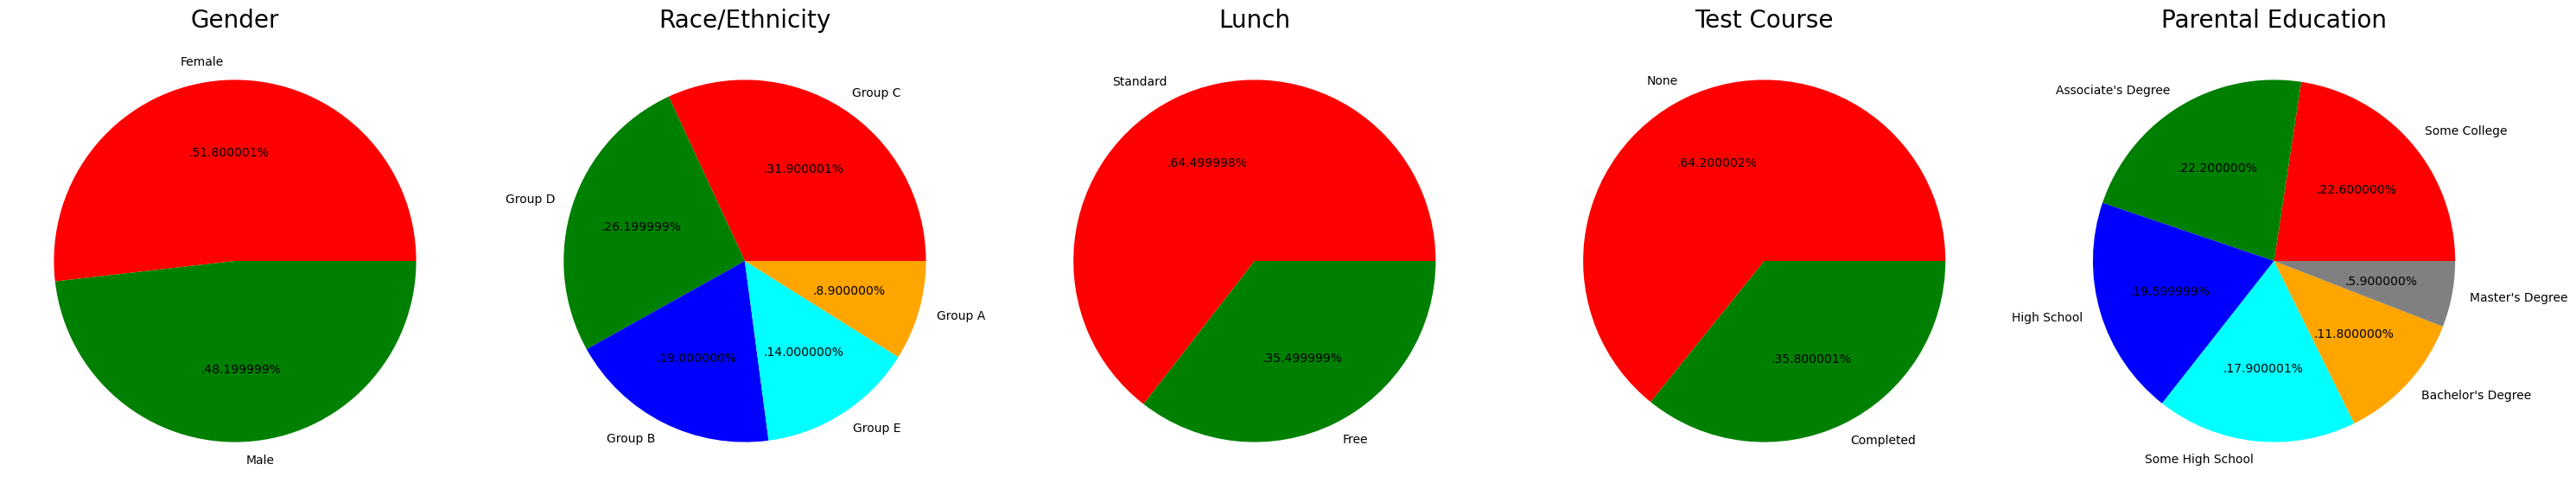

In [34]:
#Multiple analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

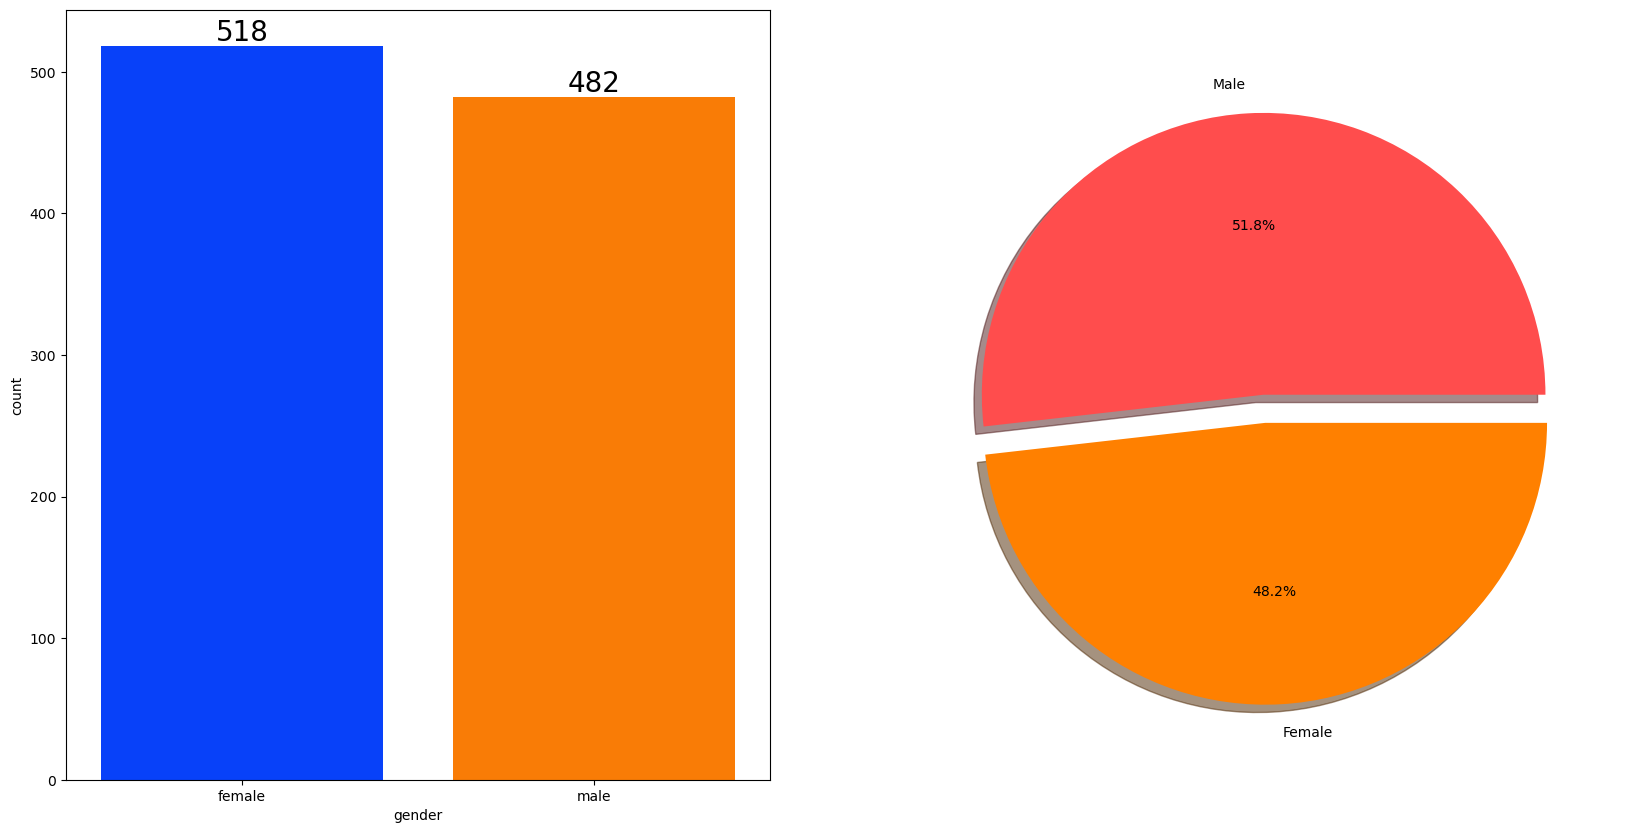

In [35]:
# feature wise visualization

#gender wise analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()



#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [36]:
# does gender have more impact on students performance

gender_group = df.groupby('gender').mean()
gender_group


,math score,reading score,writing score,total score,percentage
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


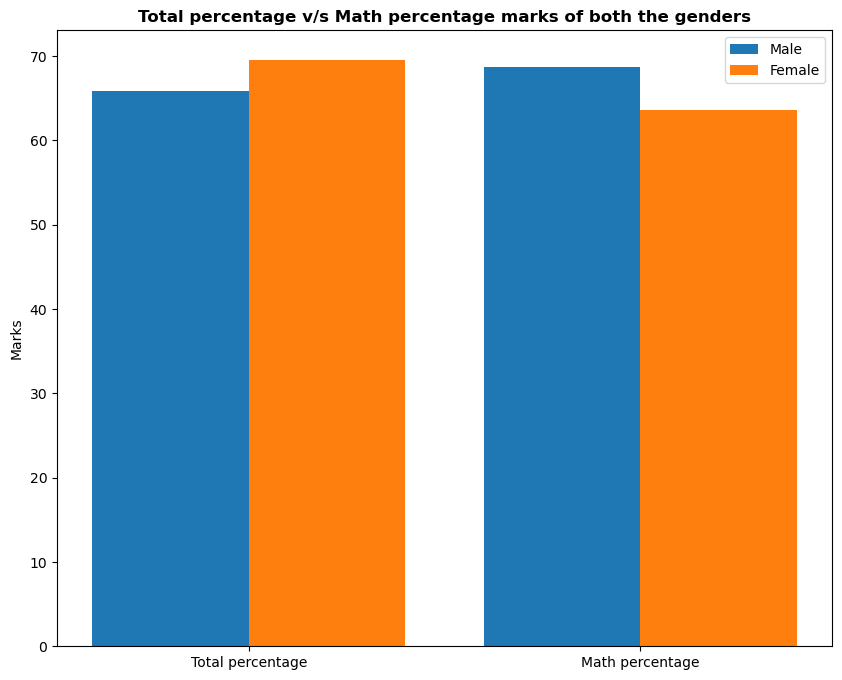

In [37]:
plt.figure(figsize=(10, 8))

X = ['Total percentage','Math percentage']


female_scores = [gender_group['percentage'][0], gender_group['math score'][0]]
male_scores = [gender_group['percentage'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total percentage v/s Math percentage marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

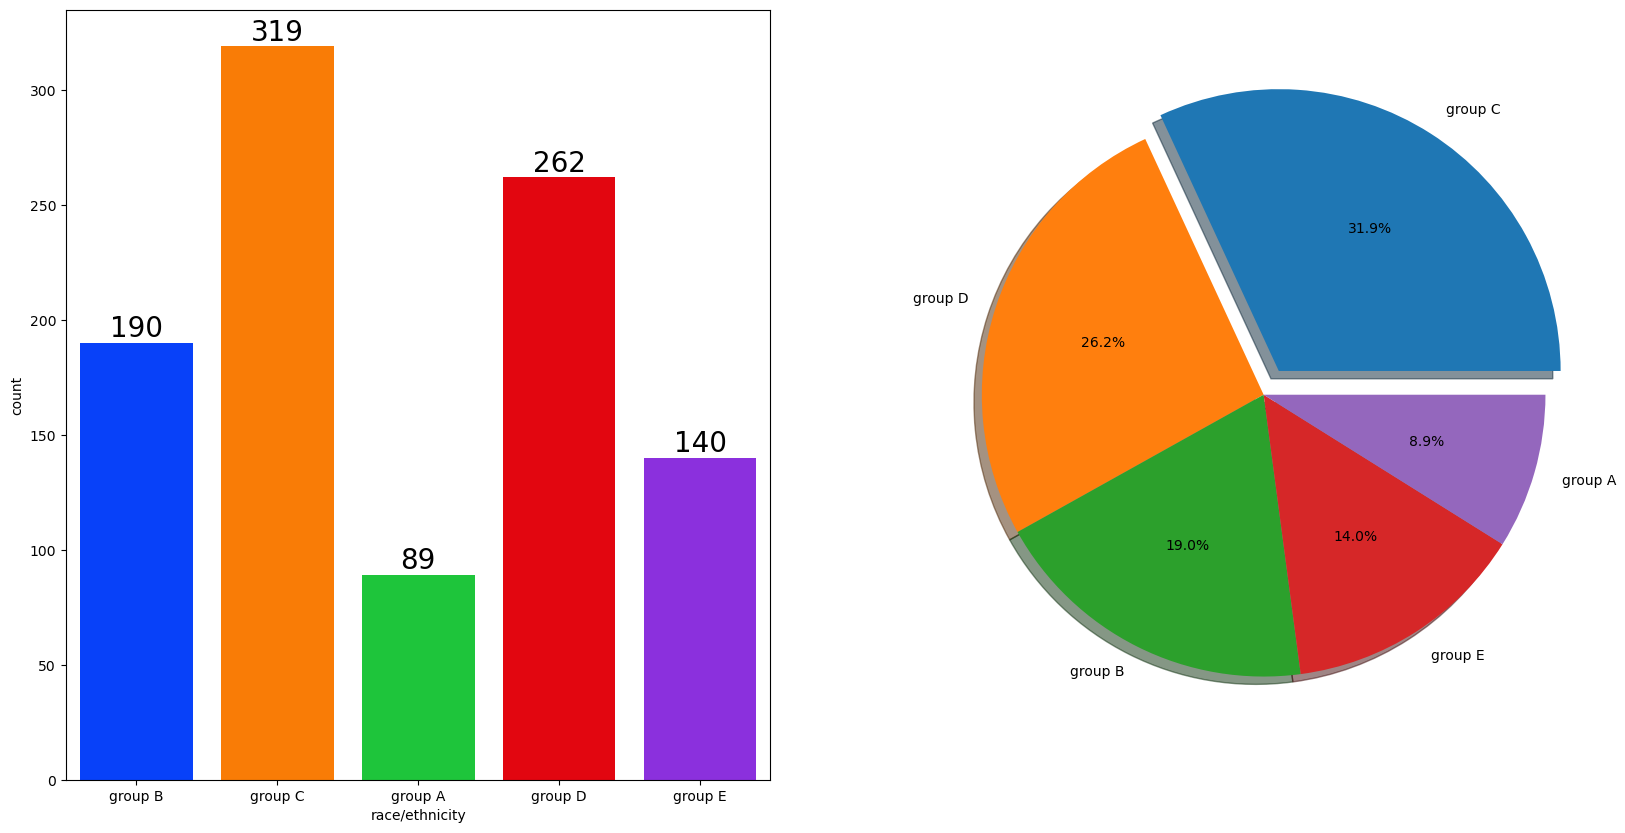

In [38]:
#race wise analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

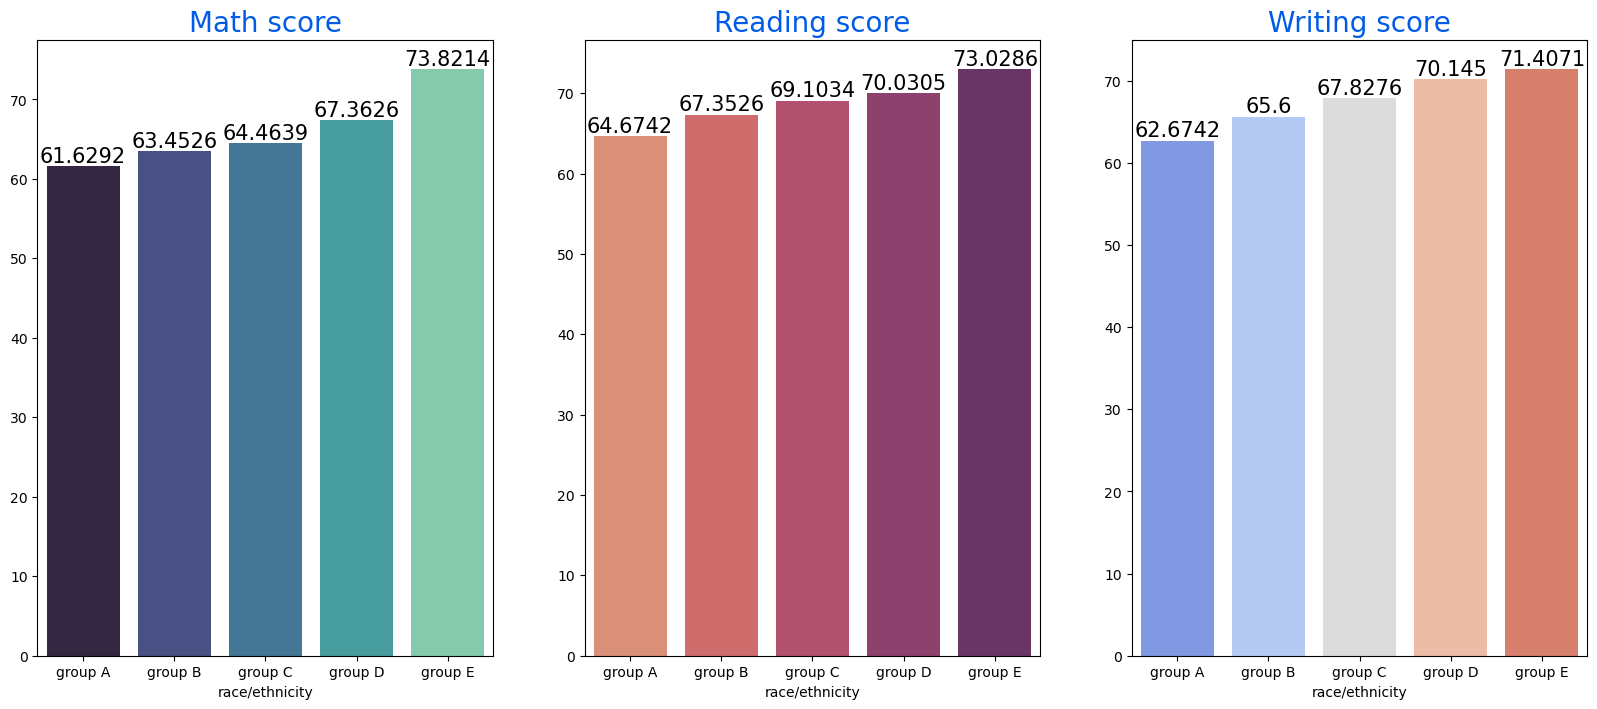

In [39]:
#does race has impact on students performance
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

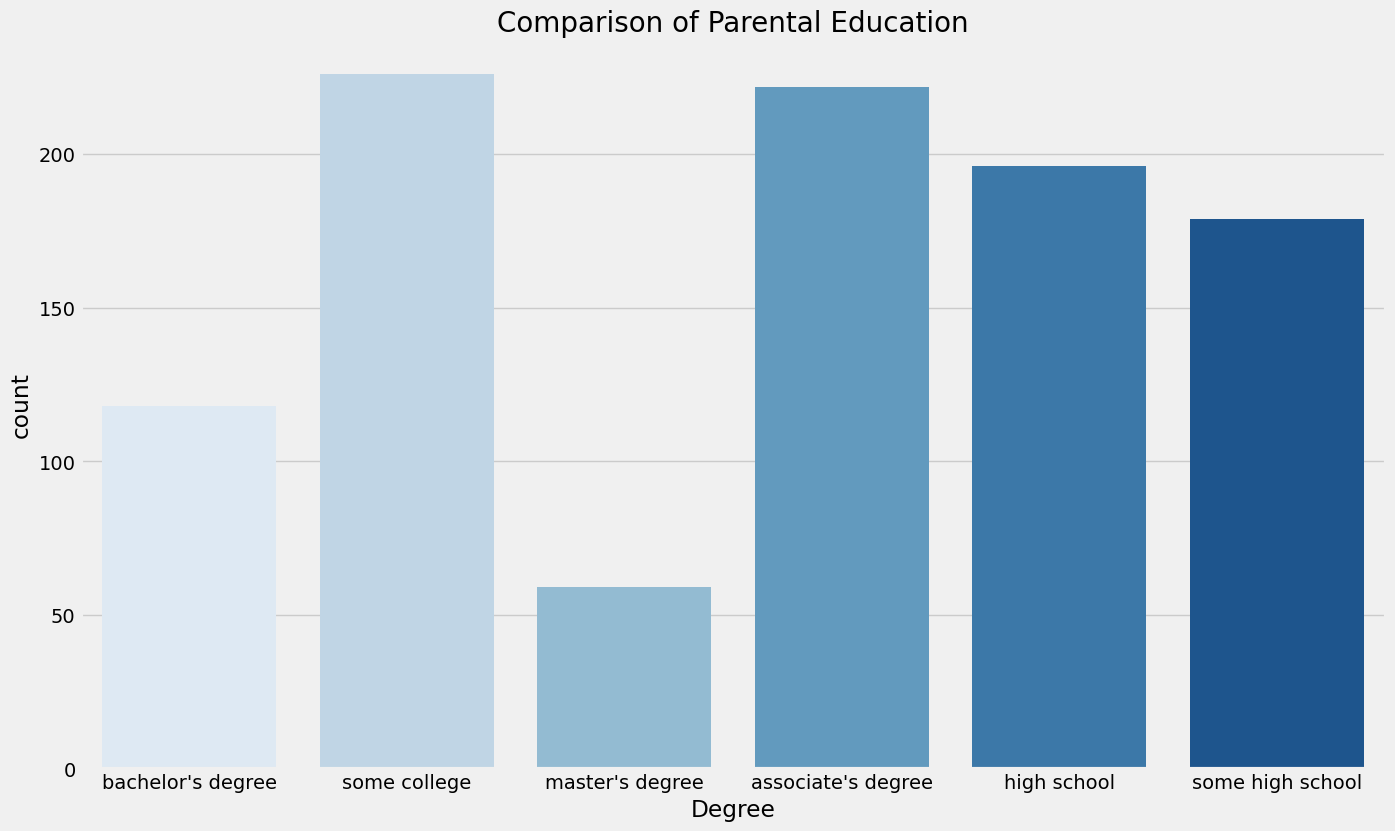

In [41]:
#parental level of education wise analysis
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data=df, x='parental level of education', palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')

plt.show()


#### Insights 
- Largest number of parents are from some college.

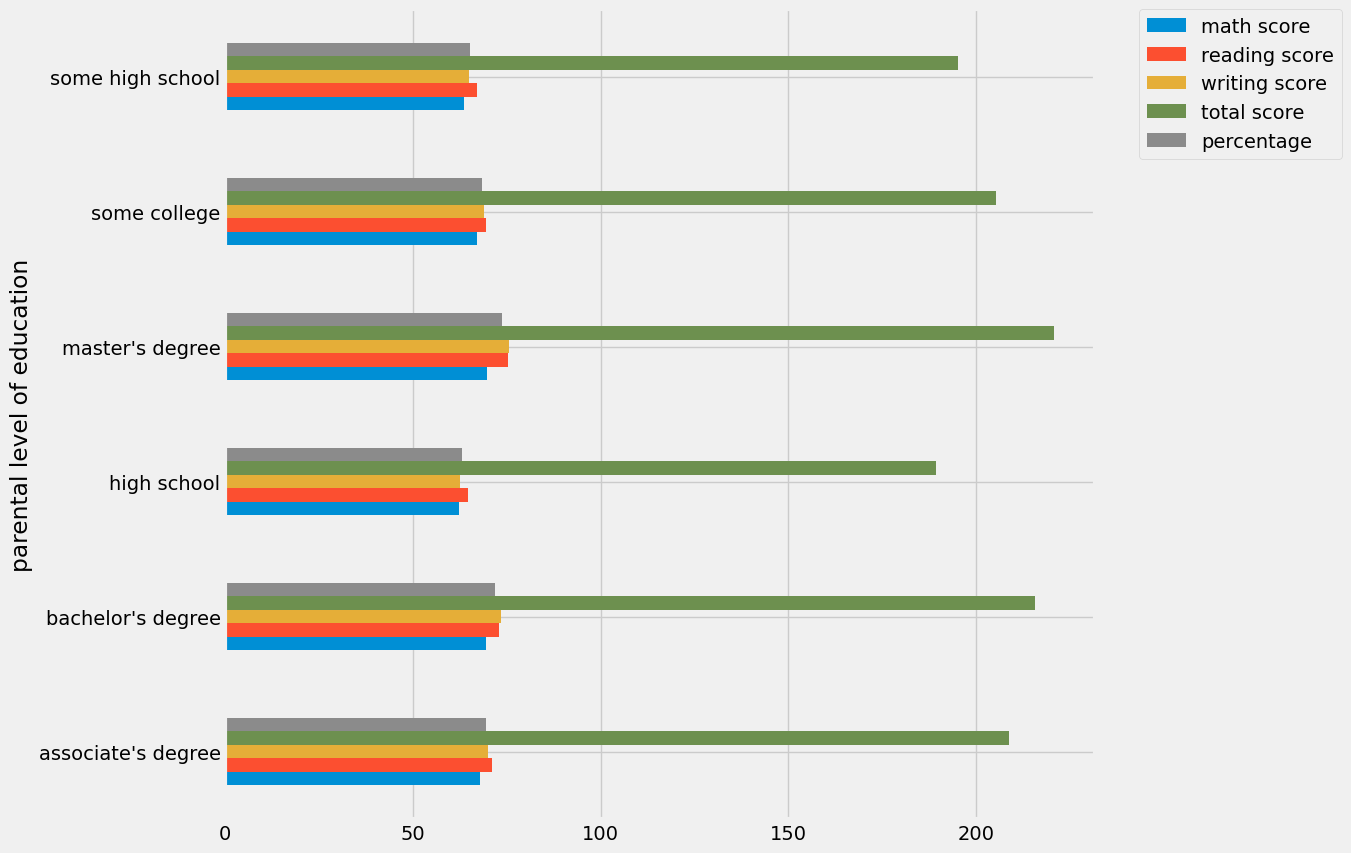

In [43]:
#does parental level of education has impact on students performance
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

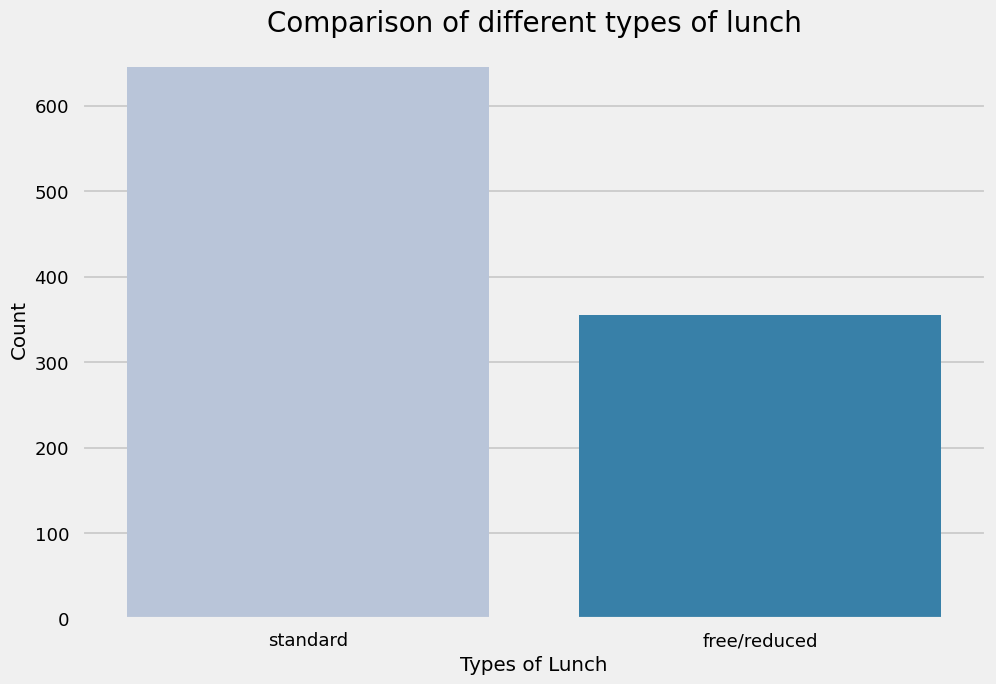

In [46]:
# lunch wise analysis
#which lunch is common among students
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
# sns.countplot(df['lunch'], palette = 'PuBu')
# plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
# plt.xlabel('types of lunch')
# plt.ylabel('count')
# plt.show()


plt.style.use('seaborn-talk')

sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

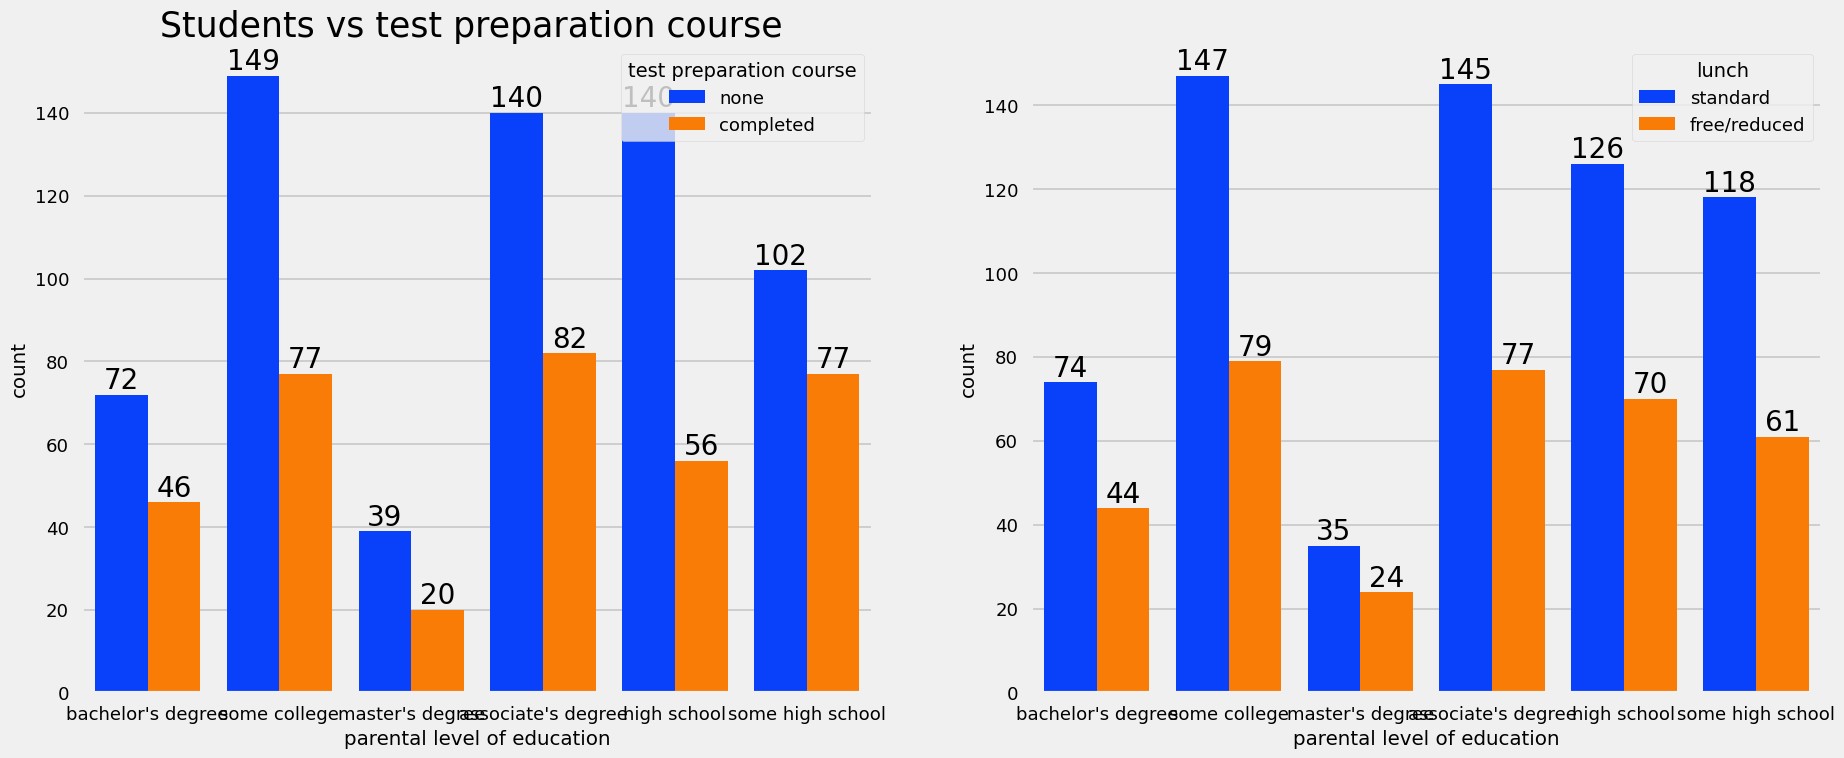

In [47]:
#does lunch intake has impact on students performance
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing score'>

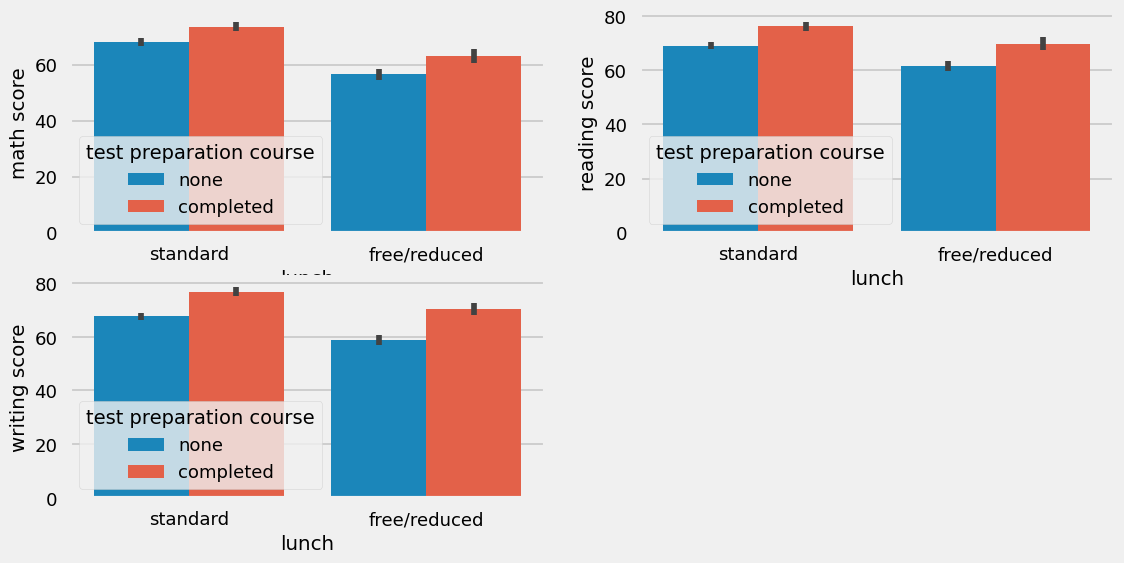

In [48]:
#test preparation course wise analysis
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

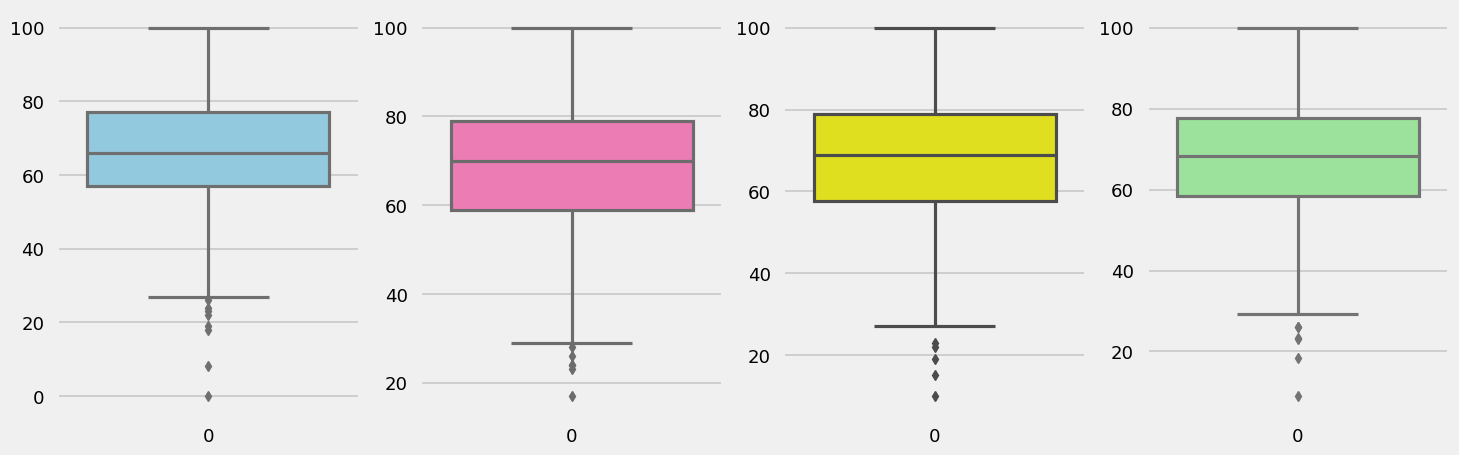

In [50]:
#checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['percentage'],color='lightgreen')
plt.show()

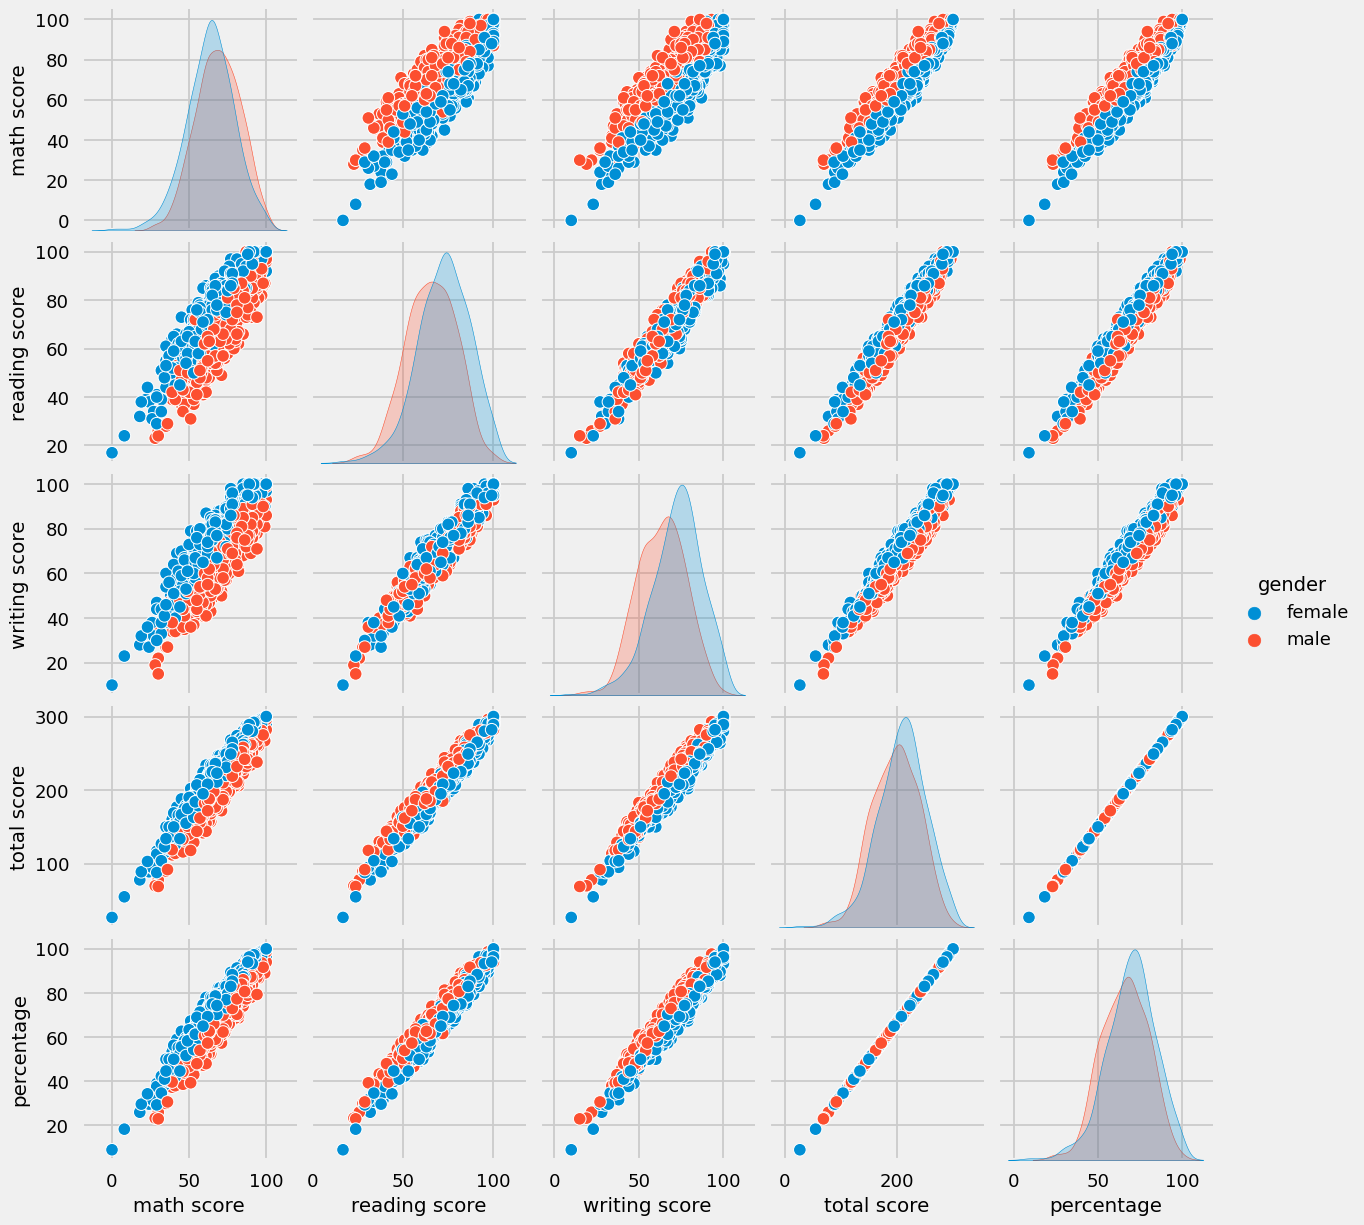

In [51]:
#mutivariate analysis
sns.pairplot(df, hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.